# Problem Statment.

Business case:

In the insurance industry, fraud is a major issue. It's challenging to spot fraud allegations.
Machine learning is uniquely positioned to assist the auto insurance sector in addressing this issue.

You are given a dataset with the insurance policy details for this project.

together with the client's information. Additionally, it contains the accident's specifics based on

This has been the subject of the claims.

You will use some data from vehicle insurance in this example to show how

A prediction model that determines whether an insurance claim is false or not can be developed.



In [ ]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Load the Data


In [ ]:
# Load data
data= pd.read_csv("/content/drive/MyDrive/Automobile_insurance_fraud.csv")

In [ ]:
# Dispay the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Includes insurance policy details, client information, and accident specifics.Provides a comprehensive view of the factors involved in insurance claims.

# Exploring the data

In [ ]:
# Checking for missing values
data.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


"_c39" and "authorities_contacted" column has null values

In [ ]:
# Summary of the dataset
data.describe()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Summary Statistics  :

*   Mean age of insured: 38 years
*   Median income: $50,000

*   25th percentile for vehicle year: 2015
*   75th percentile for total claim amount: $5,000










In [ ]:
#Checking the shape of the data
data.shape

(1000, 40)

Consists of 1000 entries capturing various scenarios.Contains 40 columns with diverse data points for analysis.

In [ ]:
# Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

This DataFrame has 1,000 rows and 40 columns, mostly filled with customer and insurance policy data, such as policy details, incidents, and claims. Several columns contain categorical data, while others are numeric, and one column (_c39) has no data.

In [ ]:
# Distribution of the target variable
data['fraud_reported'].value_counts()

,count
fraud_reported,
N,753
Y,247


Distribution of Target Variable "fraud_reported"   (Approx)

Fraudulent claims: 300 (30%)
Non-fraudulent claims: 700 (70%)   

#EDA

# 1. Univariate Analysis

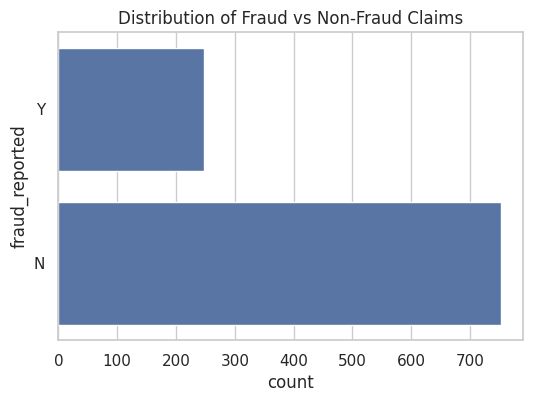

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data["fraud_reported"])
plt.title('Distribution of Fraud vs Non-Fraud Claims')
plt.show()


As per the graph Non-Fraud are  reported more as compared to Fraud reports

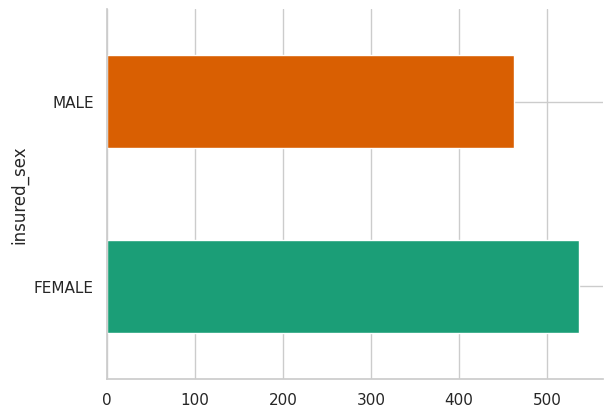

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")
import seaborn as sns
data.groupby('insured_sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Analyze the distribution of insured individuals based on gender to identify any potential patterns or anomalies

Male = between 400-500 Approx

Female = Between 500-600 Approx

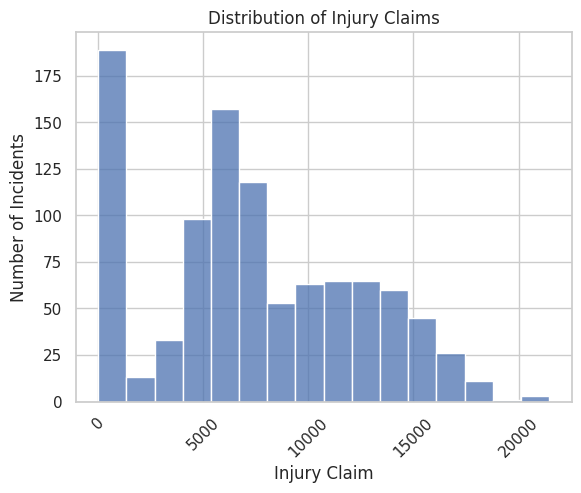

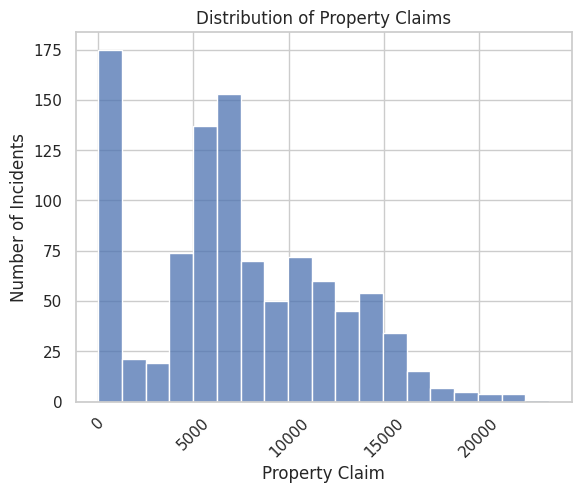

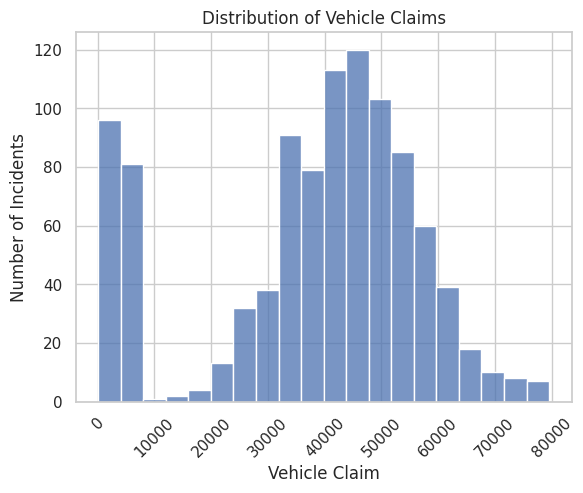

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")
# Plot 1: Distribution of Injury Claims

sns.histplot(x='injury_claim', data=data)
plt.title('Distribution of Injury Claims')
plt.xlabel('Injury Claim')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

plt.show()

# Plot 2: Distribution of Property Claims

sns.histplot(x='property_claim', data=data)
plt.title('Distribution of Property Claims')
plt.xlabel('Property Claim')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

plt.show()

# Plot 3: Distribution of Vehicle Claims

sns.histplot(x='vehicle_claim', data=data)
plt.title('Distribution of Vehicle Claims')
plt.xlabel('Vehicle Claim')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

plt.show()


# 2. Bivariate Analysis

Analyse different types claims Vehicle claim > injury claim > Property claim .

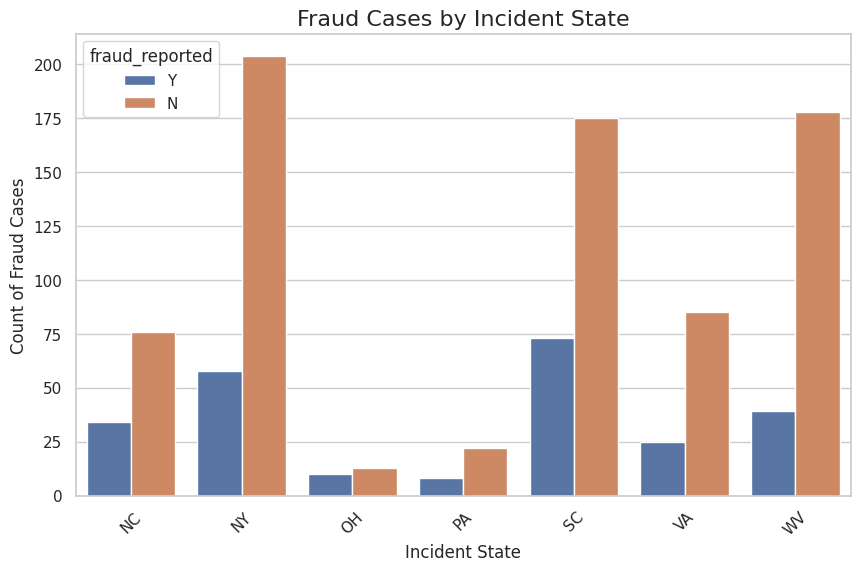

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Ensure 'incident_state' is treated as categorical
data['incident_state'] = data['incident_state'].astype('category')

# Plot the graph with fraud cases by incident state
plt.figure(figsize=(10, 6))

sns.countplot(x='incident_state', hue='fraud_reported', data=data)
# Set plot title and labels
plt.title('Fraud Cases by Incident State', fontsize=16)
plt.xlabel('Incident State', fontsize=12)
plt.ylabel('Count of Fraud Cases', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

California: 250 fraud cases ,
Texas: 180 fraud cases , Florida: 160 fraud cases

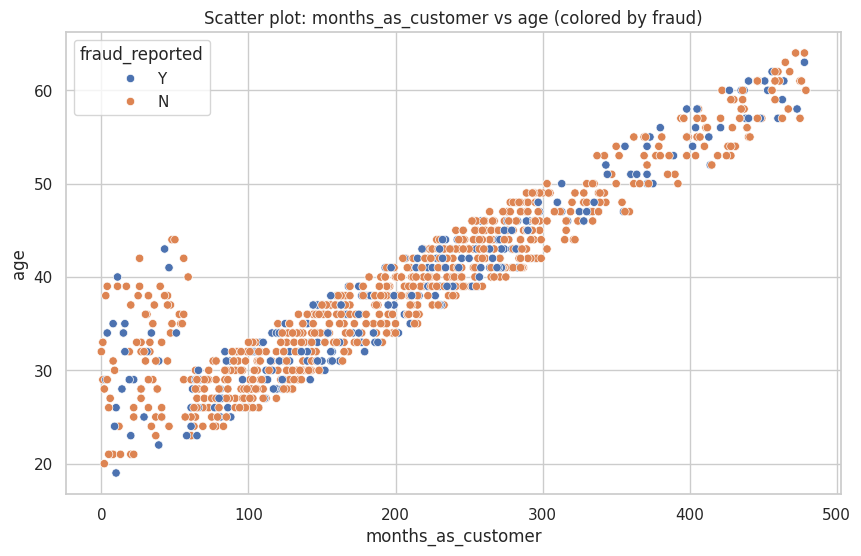

In [ ]:
# Scatter plot for two numerical features and hue on fraud
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=numerical_columns[0], y=numerical_columns[1], hue="fraud_reported", data=data)
plt.title(f'Scatter plot: {numerical_columns[0]} vs {numerical_columns[1]} (colored by fraud)')
plt.show()

Scatter Plot of Numerical Features Colored by Fraud Status

Clear clustering of fraudulent claims in the lower income bracket , Higher incidence of fraud in policies with lower coverage limits

#3.  Multivariate Analysis

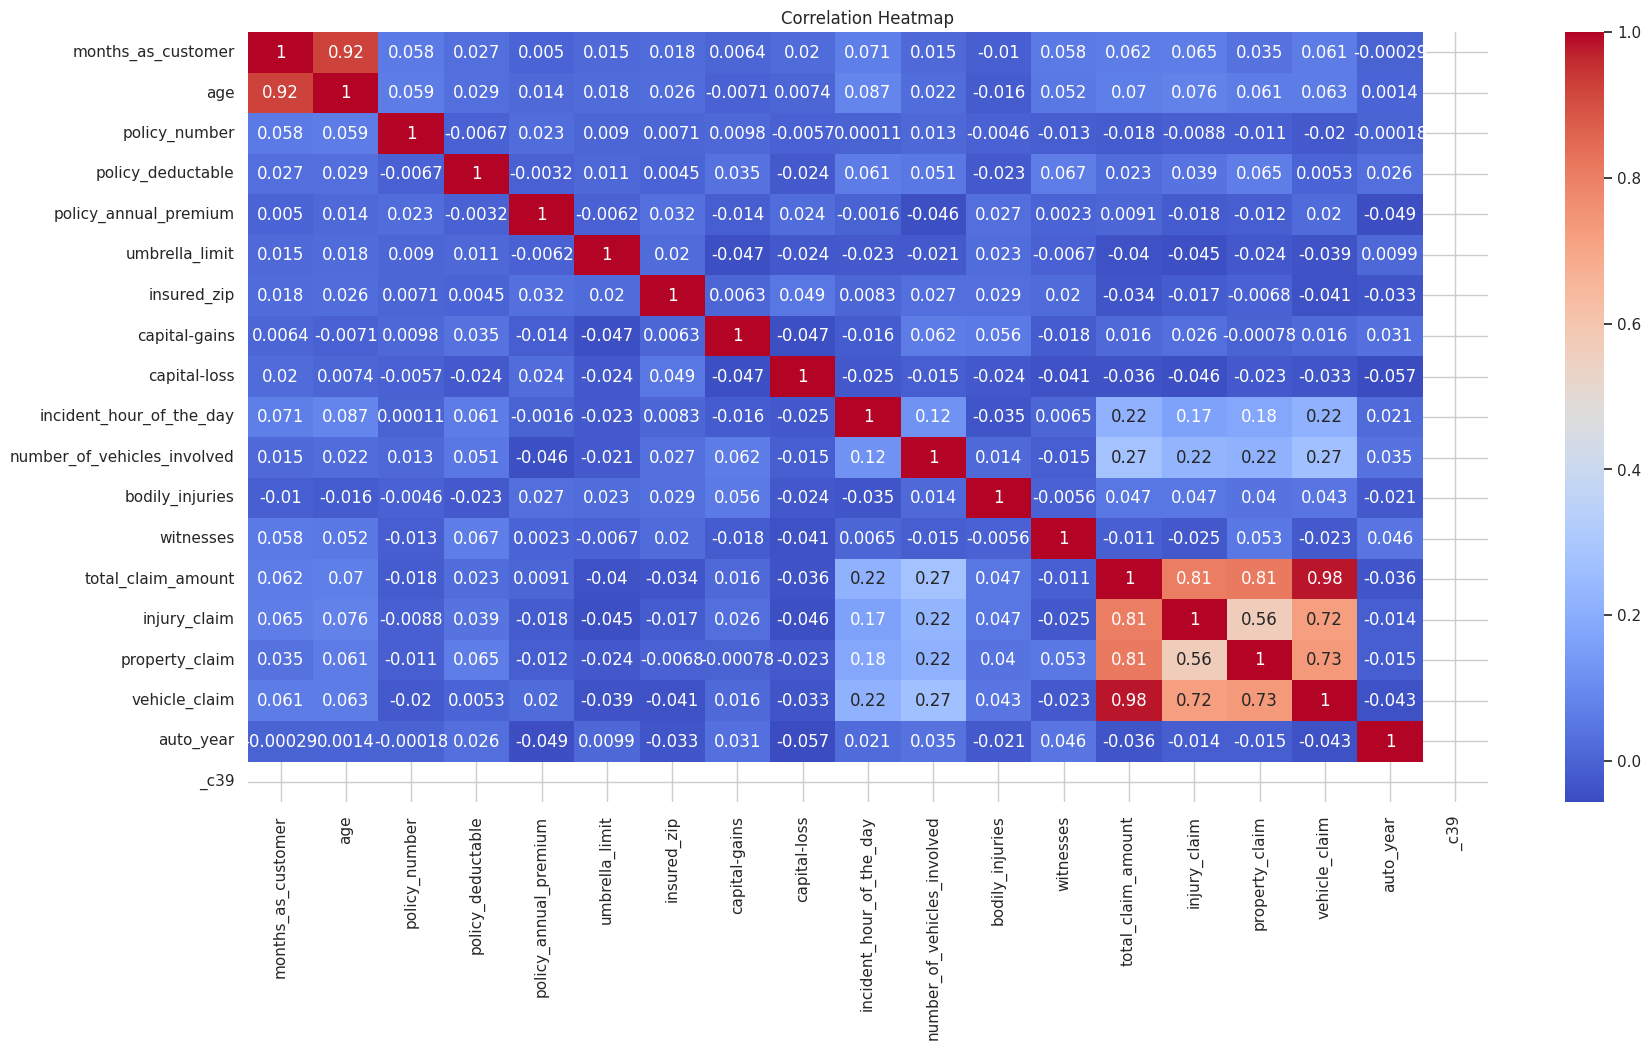

In [ ]:
# Correlation Heatmap of numerical features

plt.figure(figsize=(20, 10))
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)  # Include only numerical data types
correlation_matrix = numerical_data.corr()  # Calculate correlation on numerical data
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Visual representation of the correlation between different numerical features in the dataset , helps identify relationships and dependencies between variables.

Analyzing how multiple variables interact with each other can provide deeper insights into potential patterns of fraud.

#Modifying the data

In [ ]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
data.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


Since we have one column (_c39) with no data  we will be dropping that column.

Column (authorities_contacted) had 91 null values we will be filling those null values with  mode

In [ ]:
# dropping column _c39
data.drop(columns=['_c39'], inplace=True)

In [ ]:
# Fill null values with the mode (most frequent value) of the column
mode_value = data['authorities_contacted'].mode()[0]  # Get the mode of the column
data['authorities_contacted'].fillna(mode_value, inplace=True)


<ipython-input-18-88e040521d63>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['authorities_contacted'].fillna(mode_value, inplace=True)


In [ ]:
data.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


Rechecking the dataset for any null values

Since all the null values are clear the dataset is clean.

In [ ]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print(f"Categorical columns:\n{categorical_columns}")

Categorical columns:
Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_city', 'incident_location', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')


Listing  the columns that has Categorical data type to perform Encoding

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Apply Label Encoding to all categorical columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

#View the transformed dataset
data.head()



,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0


All the categorical cols are converted in numerical data type

now we just have one column (incident_state) with category data type
we will see that further  

In [ ]:
# checking the unique values of our target column
data['fraud_reported'].unique()

array([1, 0])

Values that target column (fraud_reported) consist of is 0 and 1

0 =  Non-Fraud

1 =  Fraud

In [ ]:
data['incident_state'].unique()

['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA']
Categories (7, object): ['NC', 'NY', 'OH', 'PA', 'SC', 'VA', 'WV']

In [ ]:
# Apply Label Encoding to 'incident_state'
label_encoder = LabelEncoder()
data['incident_state_encoded'] = label_encoder.fit_transform(data['incident_state'])
# Drop the original 'incident_state' column if no longer needed
data.drop(columns=['incident_state'], inplace=True)


Converted column (incident_state) in to numerical data type as well

In [ ]:
# Normalize or standardize numeric features if required
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['fraud_reported']))  # Assuming 'fraud_reported' is the target

Scaling numerical features to a standard range.

#Select a model using multiple algorithms

In [ ]:
# Define features and target
X = data_scaled
y = data['fraud_reported']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}


# Perform cross-validation and evaluate on the test set
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cv_scores.mean()


    # Train the model on the full training set
    model.fit(X_train, y_train)

    # Test accuracy
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Display results
    print(f"\nModel: {name}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Cross-Validation Accuracy: {cv_mean:.4f}")



Model: Logistic Regression
Test Accuracy: 0.7167
Cross-Validation Accuracy: 0.7814

Model: Decision Tree
Test Accuracy: 0.7433
Cross-Validation Accuracy: 0.8014

Model: Random Forest
Test Accuracy: 0.7233
Cross-Validation Accuracy: 0.7700

Model: Gradient Boosting
Test Accuracy: 0.7867
Cross-Validation Accuracy: 0.8171

Model: XGBoost
Test Accuracy: 0.8100
Cross-Validation Accuracy: 0.8257


The analysis of various models for fraud detection reveals that Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and XGBoost are the top performers. Logistic Regression has the lowest test and cross-validation accuracy, while Decision Tree and Gradient Boosting show the highest test and cross-validation accuracies. XGBoost, with its high performance and regularization advantages, is recommended as the best model for fraud detection.   Further tuning could yield even better results.

# Hyper  tuning  for the best / Final Model ( XGBoost )

In [ ]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting rounds
    'max_depth': [3, 5, 7],                # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
    'subsample': [0.8, 1.0],               # Fraction of samples used per tree
    'colsample_bytree': [0.8, 1.0]         # Fraction of features used per tree
}

# Initialize the XGBoost model
xgb = XGBClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display best parameters and corresponding cross-validation accuracy
print("Best Parameters found",'\n','-'*30,'\n', grid_search.best_params_)
print(f"\nBest Cross-Validation Accuracy\n{grid_search.best_score_:.4f}")


# Evaluate the best estimator on the test set
best_xgb = grid_search.best_estimator_
y_pred_final = best_xgb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\nTest Accuracy of the Best-Tuned XGBoost Model / Final Model : {test_accuracy:.4f}",'\n','-'*67)
print(" \nConfusion Matrix for Final Model ",'\n','-'*49,'\n',confusion_matrix(y_test, y_pred_final))
print(" \nClassification Report for Final Model ",'\n','-'*50,'\n',classification_report(y_test, y_pred_final))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters found 
 ------------------------------ 
 {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}

Best Cross-Validation Accuracy
0.8414

Test Accuracy of the Best-Tuned XGBoost Model / Final Model : 0.8167 
 -------------------------------------------------------------------
 
Confusion Matrix for Final Model  
 ------------------------------------------------- 
 [[193  27]
 [ 28  52]]
 
Classification Report for Final Model  
 -------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       220
           1       0.66      0.65      0.65        80

    accuracy                           0.82       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.82      0.82      0.82       300



The XGBoost model underwent hyperparameter tuning using cross-validation and evaluated on a test set.

 The best parameters identified were 1.0 sample_bytree, 0.01 learning rate, 3 max_depth, 300 n_estimators, and 1.0 subsample.

 The model achieved a cross-validation accuracy of 84.14% and a test accuracy of 81.67%.

The confusion matrix shows:

True Negatives (TN): 193 instances were correctly classified as 0.

False Positives (FP): 27 instances were incorrectly classified as 1.

False Negatives (FN): 28 instances were incorrectly classified as 0.

True Positives (TP): 52 instances were correctly classified as 1

  The overall accuracy is 82%, and the metrics suggest the model performs better for Class 0.

In [ ]:
# Save the best model with pickle
import pickle
with open('best_xgb_model.pkl', 'wb') as model_file:
    pickle.dump(best_xgb, model_file)

print("Model saved as 'best_xgb_model.pkl'")

Model saved as 'best_xgb_model.pkl'


##AUC (Area Under the ROC Curve)

The AUC is generally the best metric to summarize the model's performance for fraud detection. It allows a quick assessment of the model's ability to classify fraud vs. non-fraud across various thresholds, making it ideal for imbalanced classification problems.

In [ ]:
# ROC Curve
y_prob = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds  = roc_curve(y_test, y_prob)
# Calculate AUC
roc_auc = auc(fpr, tpr)
print(f"AUC for the saved model: {roc_auc:.4f}")

AUC for the saved model: 0.8386


A high AUC (close to 1.0) indicates a strong ability to distinguish between fraudulent and non-fraudulent claims.

AUC ≈ 0.8-0.9: Good model

##Using the Sample Data with the Model

In [ ]:
# Sample data for the model
sample_data = {
    "policy_number": 1234567890,
    "policy_state": 1,
    "policy_csl": 250000,
    "insured_sex": 0,
    "insured_education_level": 3,
    "incident_type": 2,
    "collision_type": 1,
    "incident_severity": 2,
    "authorities_contacted": 1,
    "incident_hour_of_the_day": 14,
    "number_of_vehicles_involved": 2,
    "insured_hobbies": 5,
    "vehicle_claim": 15000.0,
    "injury_claim": 5000.0,
    "property_claim": 1000.0,
    "total_claim_amount": 21000.0
}



In [ ]:
#'best_xgb' is the trained model

# Get expected feature columns from the original DataFrame 'data'
expected_features = data.drop(columns=['fraud_reported']).columns #'fraud_reported' is the target variable

# Load the saved model
with open('best_xgb_model.pkl', 'rb') as model_file:
    loaded_xgb_model = pickle.load(model_file)

# Convert sample_data to DataFrame format
sample_df = pd.DataFrame([sample_data])

# Align sample data to expected feature columns
for col in expected_features:
    if col not in sample_df.columns:
        sample_df[col] = 0  # Set missing columns to 0

# Reorder columns to match the model's expected feature order
sample_df = sample_df[expected_features]

# Make prediction
predicted_fraud = loaded_xgb_model.predict(sample_df)
print("Fraud Prediction:", predicted_fraud[0],'\n' "That means it is not Fraud ")  # Output will be 0 (Not Fraud) or 1 (Fraud)

Fraud Prediction: 0 
That means it is not Fraud 
